# Projeto - Analise de Dados com Python e Pandas 


### Este projeto tem como objetivo demonstrar a capacidade de trabalhar com a biblioteca Pandas de Python


#### Tema - Covid-19 no Brasil

A base utilizada foi extraída do site: https://covid.saude.gov.br no dia 27/08/2021.



In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import datetime as dt
import plotly.graph_objects as go
import plotly.express as px

In [15]:
warnings.filterwarnings('ignore')

# Extração e Validação 

In [16]:
df_covid_pt1 = pd.read_csv("HIST_PAINEL_COVIDBR_2020_Parte1_27ago2021.csv", sep=";", parse_dates=['data'], dayfirst=True)
df_covid_pt2 = pd.read_csv("HIST_PAINEL_COVIDBR_2020_Parte2_27ago2021.csv", sep=";", parse_dates=['data'], dayfirst=True)
df_covid_pt3 = pd.read_csv("HIST_PAINEL_COVIDBR_2021_Parte1_27ago2021.csv", sep=";", parse_dates=['data'], dayfirst=True)
df_covid_pt4 = pd.read_csv("HIST_PAINEL_COVIDBR_2021_Parte2_27ago2021.csv", sep=";", parse_dates=['data'], dayfirst=True)

In [17]:
df_covid = pd.concat([df_covid_pt1, df_covid_pt2, df_covid_pt3, df_covid_pt4])
df_covid.dtypes

regiao                            object
estado                            object
municipio                         object
coduf                              int64
codmun                           float64
codRegiaoSaude                   float64
nomeRegiaoSaude                   object
data                      datetime64[ns]
semanaEpi                          int64
populacaoTCU2019                 float64
casosAcumulado                   float64
casosNovos                         int64
obitosAcumulado                    int64
obitosNovos                        int64
Recuperadosnovos                 float64
emAcompanhamentoNovos            float64
interior/metropolitana           float64
dtype: object

In [18]:
df_covid['casosAcumulado'] = df_covid['casosAcumulado'].astype('int64')

# Primeiro Gráfico

Neste gráfico utilizamos a evolução dos casos e óbitos acumulados. 
Para a projeção no gráfico usamos um intervalos de 15 dias de uma data para outra.

In [19]:
brasil = df_covid.loc[df_covid['regiao'] == 'Brasil', ['data', 'casosAcumulado', 'obitosAcumulado']].sort_values(by=['data'])[0::15] 
brasil['data'] = brasil['data'].dt.strftime('%d/%m/%Y')

In [20]:
data= brasil.data
obitos= brasil.obitosAcumulado
casos= brasil.casosAcumulado
fig = go.Figure(data=[
    go.Bar(name='Óbitos', x=data, y=obitos, marker={'color': 'green'}),
    go.Bar(name='Casos', x=data, y=casos),
])
fig.update_layout(barmode='group')
fig.show()

# Segundo Gráfico

Neste gráfico fazemos um comparativo da quantidade dos casos confirmados de Covid-19 e os óbitos por causa da Covid-19 entre os anos 2020 e 2021.

In [21]:
comp = df_covid.groupby('regiao').get_group('Brasil')
comp = comp.groupby(comp['data'].dt.year)['casosNovos', 'obitosNovos'].sum().reset_index()

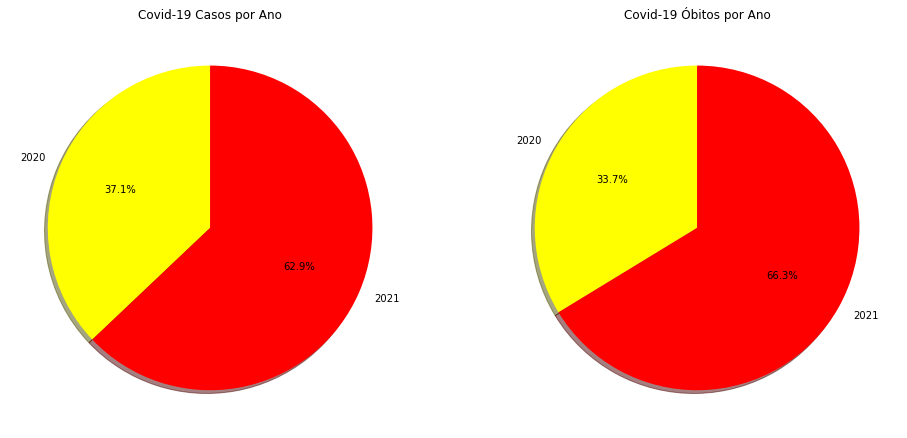

In [22]:
plt.figure(figsize=(16, 9))

plt.subplot(1, 2, 1 )
plt.title("Covid-19 Casos por Ano")
plt.pie(comp.casosNovos, labels=comp.data, colors=["yellow", "red"], autopct='%1.1f%%', shadow=True, startangle=90)

plt.subplot(1, 2, 2 )
plt.title("Covid-19 Óbitos por Ano")
plt.pie(comp.obitosNovos, labels=comp.data, colors=["yellow", "red"], autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

# Terceiro Gráfico

Neste gráfico demonstramos os casos acumulados de Covid-19 separados por região e estado.

In [23]:
grafico_regiao = df_covid.groupby(['regiao', 'estado'])['casosAcumulado'].max().reset_index()
grafico_regiao['all'] = 'all'
fig = px.treemap(grafico_regiao,path=[grafico_regiao.regiao,grafico_regiao.estado],values="casosAcumulado", title = "Casos de Convid-19 - Confirmados")
fig.show()

# Quarto Gráfico

Neste gráfico a informação que é passada Casos Acumulados de Covid-19 e Óbitos de Covid-19 separados por região.

In [24]:
regiao = df_covid.groupby(['regiao', 'estado'])['casosAcumulado', 'obitosAcumulado'].max().groupby('regiao')['casosAcumulado', 'obitosAcumulado'].sum().reset_index()

In [25]:
def autolabel(grupos):
    for i in grupos:
        h = i.get_height()
        ax.annotate('{}'.format(h),
                   xy = (i.get_x()+i.get_width()/2,h),
                   xytext = (0,3),
                   textcoords = 'offset points',
                   ha = 'center' 
                   )

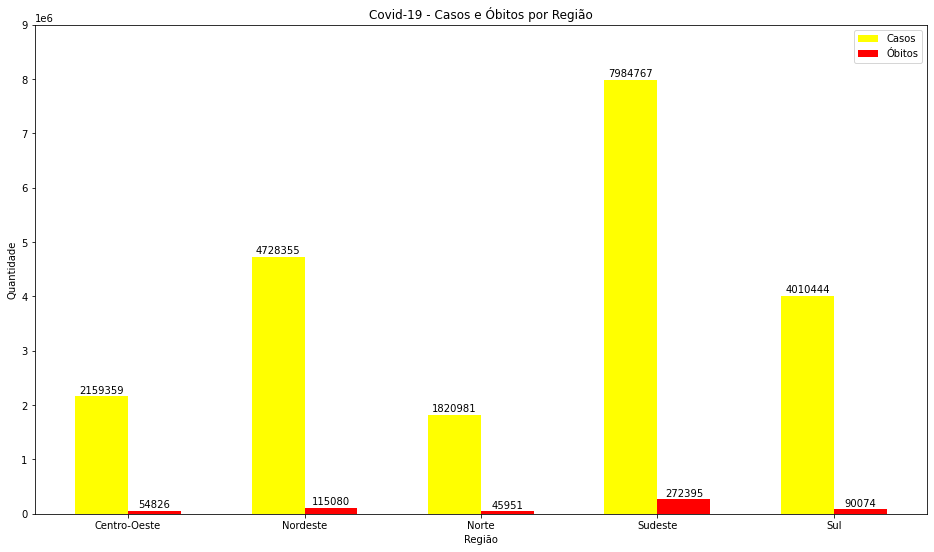

In [26]:
fig,ax = plt.subplots(figsize = (16,9))

regioes = regiao.regiao
casos = regiao.casosAcumulado
obitos = regiao.obitosAcumulado
x = np.arange(len(regioes))

largura = 0.30

grupo1 = ax.bar( x - largura/2, casos, largura, label = 'Casos', color = 'yellow')
grupo2 = ax.bar( x + largura/2, obitos, largura, label = 'Óbitos', color = 'red')

ax.set_title('Covid-19 - Casos e Óbitos por Região')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Região')

ax.legend()

ax.set_ylim([0, 9000000])

ax.set_xticks(x)
ax.set_xticklabels(regioes)

autolabel(grupo1)
autolabel(grupo2)

plt.show()